In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("business.retailsales2.csv")
df.head(6)

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.5,-234.45,-17.50,9369.55,1204.32,10573.87


In [4]:
df.tail()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
31,August,2019,105,8839.50,-201.67,-84.37,8553.46,1724.75,10278.21
32,September,2019,88,9077.45,-354.89,-853.35,7869.21,1567.65,9436.86
33,October,2019,97,9132.25,-279.42,-1572.55,7280.28,1631.25,8911.53
34,November,2019,272,23997.90,-776.84,-364.51,22856.55,4824.75,27681.30
35,December,2019,342,31183.90,-2269.51,-1311.18,27603.21,5703.25,33306.46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         36 non-null     object 
 1   Year          36 non-null     int64  
 2   Total Orders  36 non-null     int64  
 3   Gross Sales   36 non-null     float64
 4   Discounts     36 non-null     float64
 5   Returns       36 non-null     float64
 6   Net Sales     36 non-null     float64
 7   Shipping      36 non-null     float64
 8   Total Sales   36 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


In [6]:
df.columns

Index(['Month', 'Year', 'Total Orders', 'Gross Sales', 'Discounts', 'Returns',
       'Net Sales', 'Shipping', 'Total Sales'],
      dtype='object')

In [7]:
df.shape

(36, 9)

In [8]:
df.describe()

,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,97.138889,9844.926389,-311.493889,-474.958056,9058.474444,1579.391667,10637.941111
std,0.828079,57.458632,4936.386351,362.766989,488.820410,4497.185264,1011.170014,5475.621125
min,2017.000000,54.000000,5720.000000,-2269.510000,-1572.550000,4589.100000,695.420000,5296.530000
25%,2017.000000,68.000000,7059.875000,-300.375000,-867.200000,6428.250000,1083.300000,7633.692500
50%,2018.000000,82.500000,8850.500000,-236.160000,-299.875000,8076.430000,1341.650000,9404.405000
75%,2019.000000,97.500000,10150.700000,-169.487500,-73.277500,9534.000000,1632.132500,11153.687500
max,2019.000000,342.000000,31183.900000,-51.500000,0.000000,27603.210000,5703.250000,33306.460000


In [9]:
cat_columns = [i for i in df.select_dtypes(include=['object']).columns]
cat_columns

['Month']

In [10]:
df['Month'].value_counts()

Month
January      3
February     3
March        3
April        3
May          3
June         3
July         3
August       3
September    3
October      3
November     3
December     3
Name: count, dtype: int64

In [16]:
df['Month'] = df['Month'].astype(str)

In [12]:
df[['Discounts','Total Sales','Net Sales']].head()

,Discounts,Total Sales,Net Sales
0,-129.40,9371.95,8283.65
1,-104.70,7280.05,6387.60
2,-172.20,5296.53,4589.10
3,-281.40,9600.90,8532.60
4,-185.75,7103.91,6237.45


In [13]:
df.isna().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [14]:
df.duplicated().sum()

0

# Creating some necessary columns needed for analysis

In [17]:
df['Net Profit'] = df['Total Sales'] - (df['Discounts'] + df['Returns'] + df['Shipping'])
df['Profit Margin'] = (df['Net Profit'] / df['Total Sales']) * 100
df['Average Order Value'] = df['Total Sales'] / df['Total Orders']
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                36 non-null     object 
 1   Year                 36 non-null     int64  
 2   Total Orders         36 non-null     int64  
 3   Gross Sales          36 non-null     float64
 4   Discounts            36 non-null     float64
 5   Returns              36 non-null     float64
 6   Net Sales            36 non-null     float64
 7   Shipping             36 non-null     float64
 8   Total Sales          36 non-null     float64
 9   Net Profit           36 non-null     float64
 10  Profit Margin        36 non-null     float64
 11  Average Order Value  36 non-null     float64
 12  Year-Month           36 non-null     object 
dtypes: float64(9), int64(2), object(2)
memory usage: 3.8+ KB


In [ ]:
## df.set_index('Year-Month', inplace=True)

In [21]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns

['Year',
 'Total Orders',
 'Gross Sales',
 'Discounts',
 'Returns',
 'Net Sales',
 'Shipping',
 'Total Sales',
 'Net Profit',
 'Profit Margin',
 'Average Order Value']

In [25]:
for i in num_columns:
    if i != 'Year':  
        print(f'Stats for {i}')
        print(f'Total : {df[i].sum().round()}')
        print(f'Average : {df[i].mean().round()}')
        print('-------------------------')

Stats for Total Orders
Total : 3497
Average : 97.0
-------------------------
Stats for Gross Sales
Total : 354417.0
Average : 9845.0
-------------------------
Stats for Discounts
Total : -11214.0
Average : -311.0
-------------------------
Stats for Returns
Total : -17098.0
Average : -475.0
-------------------------
Stats for Net Sales
Total : 326105.0
Average : 9058.0
-------------------------
Stats for Shipping
Total : 56858.0
Average : 1579.0
-------------------------
Stats for Total Sales
Total : 382966.0
Average : 10638.0
-------------------------
Stats for Net Profit
Total : 354420.0
Average : 9845.0
-------------------------
Stats for Profit Margin
Total : 3354.0
Average : 93.0
-------------------------
Stats for Average Order Value
Total : 4075.0
Average : 113.0
-------------------------


In [34]:
 ##df['Year'] = pd.to_datetime(df['Year'])
#df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].astype('int64').astype('int32')

In [27]:
df.set_index('Year-Month', inplace=True)

In [47]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

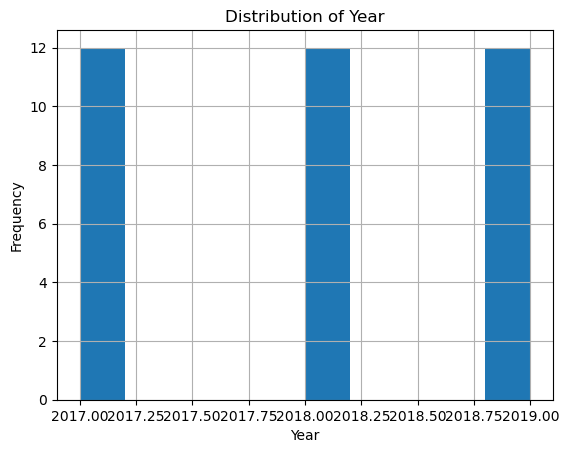

In [42]:
df['Year'].hist()
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# The upward trend here may suggest growth or positive business change over a period of time

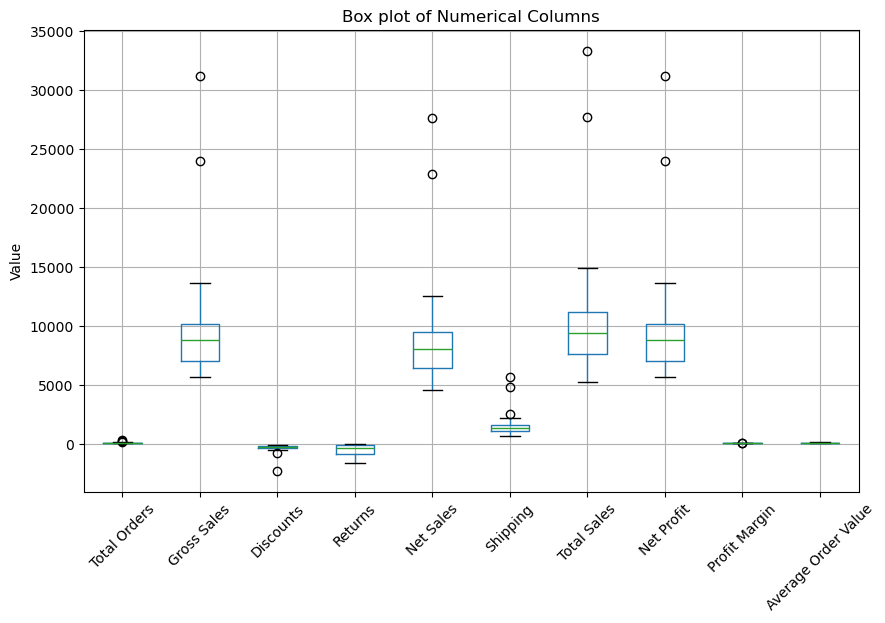

In [38]:
df[num_columns].boxplot(figsize=(10, 6))
plt.title('Box plot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

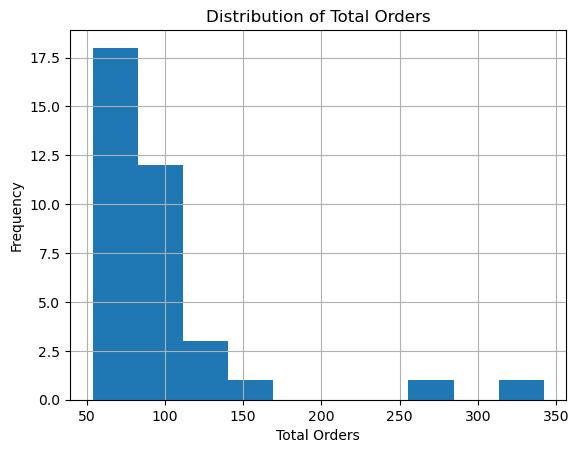

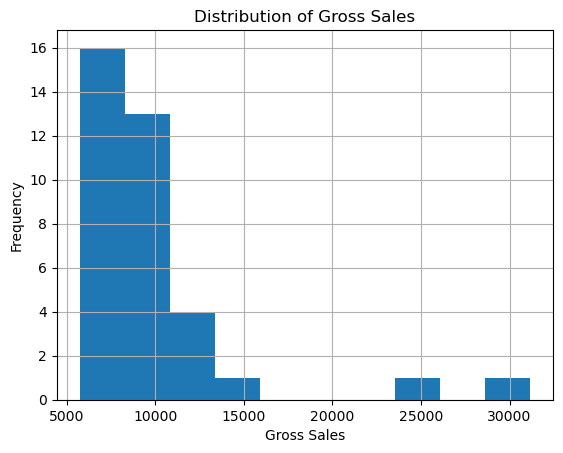

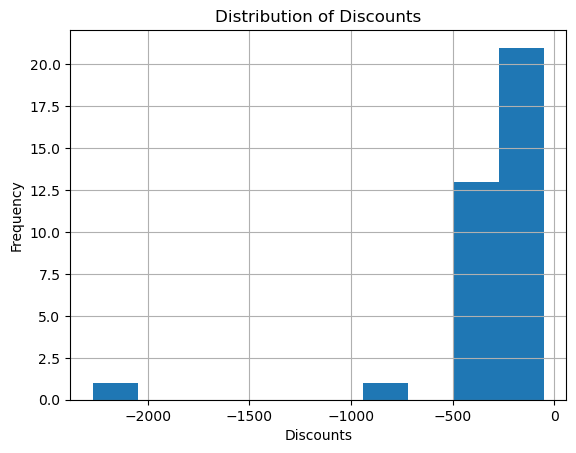

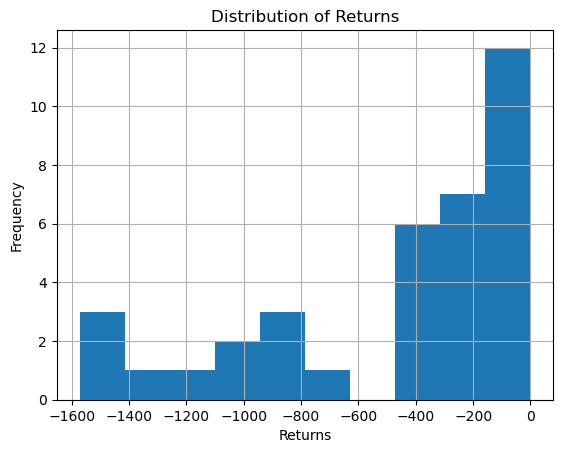

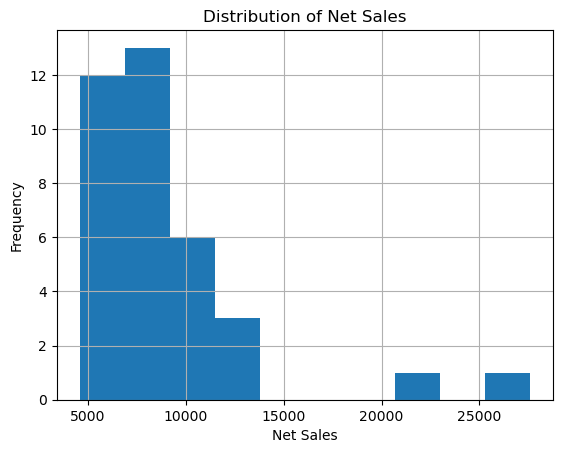

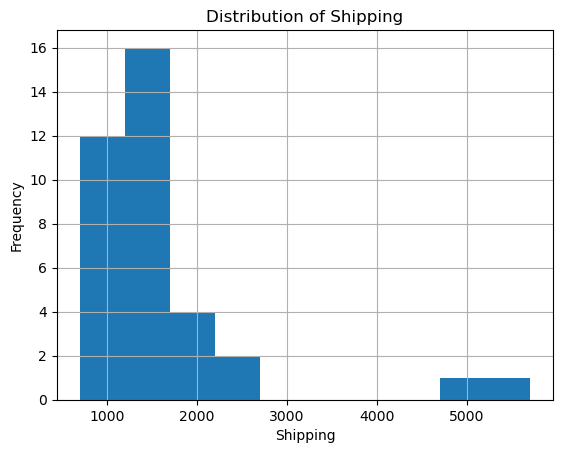

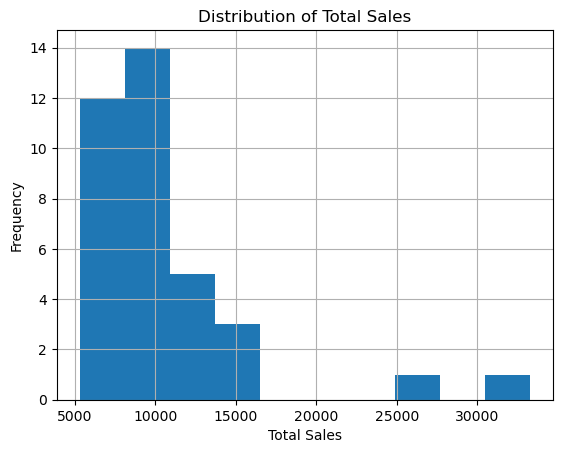

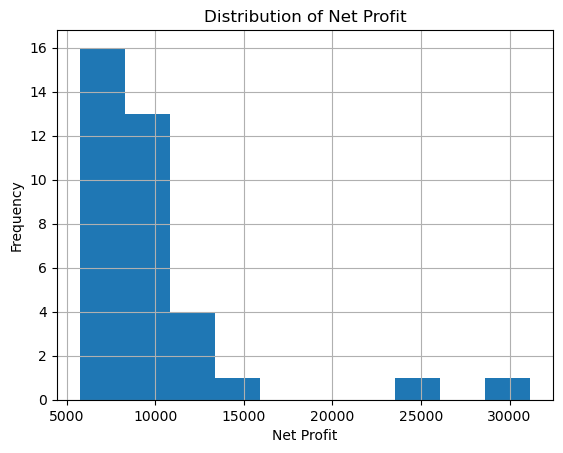

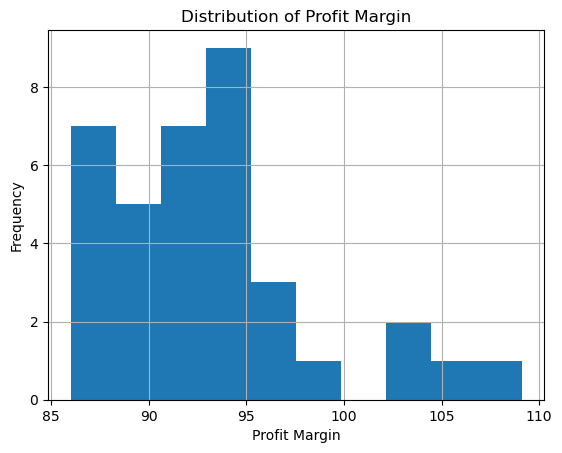

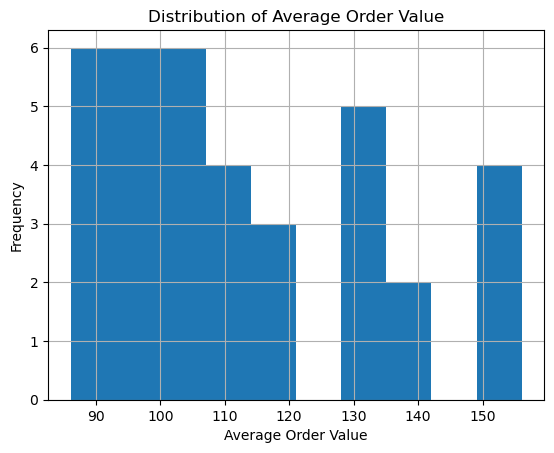

In [36]:
num_columns = ['Total Orders', 'Gross Sales', 'Discounts', 'Returns', 'Net Sales', 'Shipping', 'Total Sales', 'Net Profit', 'Profit Margin', 'Average Order Value']
for column in num_columns:
    df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# When total orders, gross sales, net sales, shipping, net profit, and total sales were at their lowest, the frequency of occurrences was highest. This suggests that there may be certain periods or conditions where the business experiences higher transaction volumes but at lower individual amounts. This could be due to factors such as clearance sales, promotional events, or seasonal fluctuations.

# When discounts were at their highest, the frequency of occurrences was at the lowest. This could indicate that during periods of high discounting, individual transactions were less frequent but possibly higher in value. Alternatively, it could suggest that discounting strategies were not effective in driving sales volume.

# Returns were highest with very high frequency initially but reduced drastically and steadily over time, along with a significant reduction in frequency. This suggests that the business may have implemented measures to reduce returns or improve product quality over time, leading to a decrease in the frequency of returns.



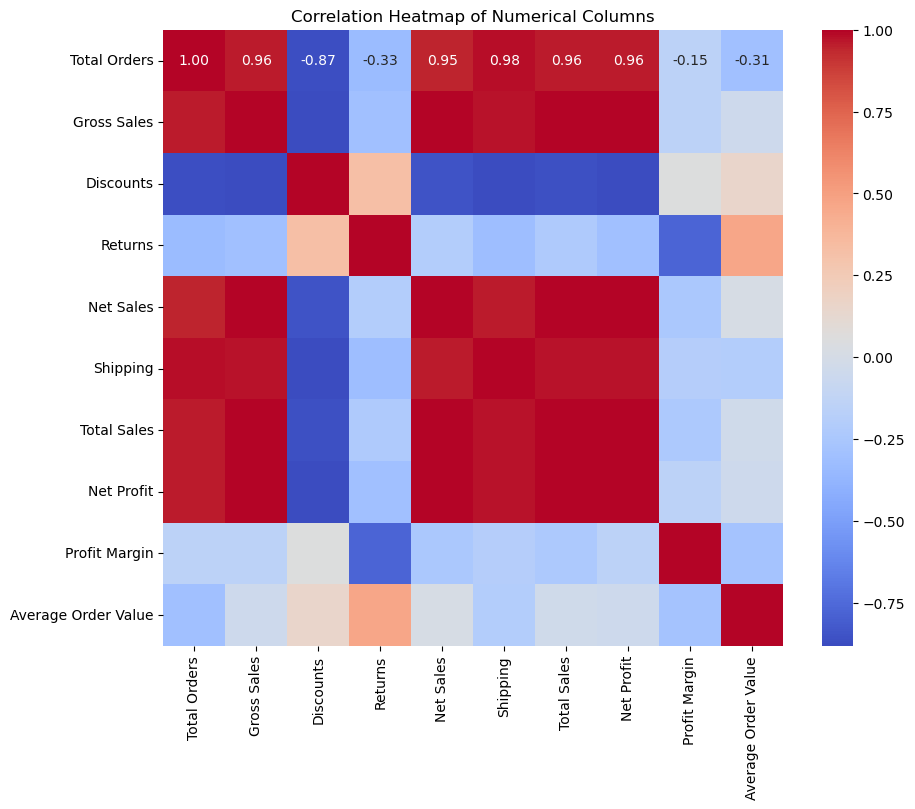

In [37]:

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

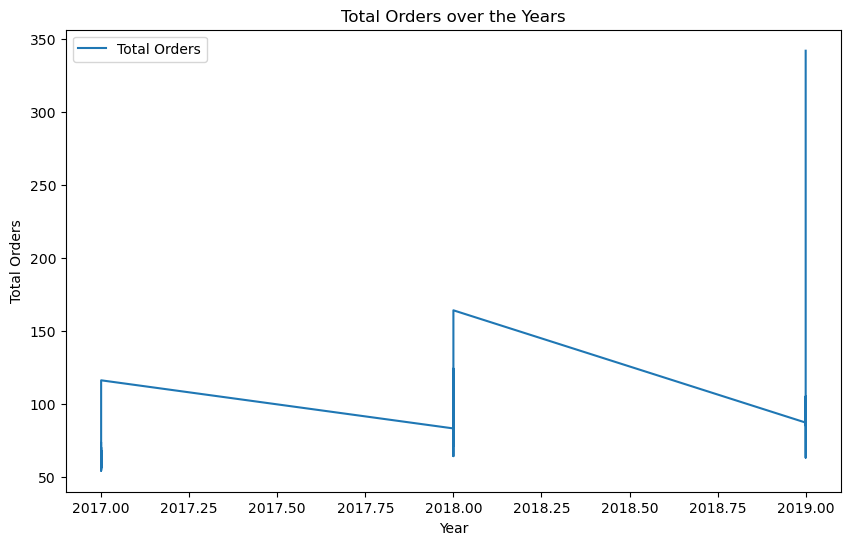

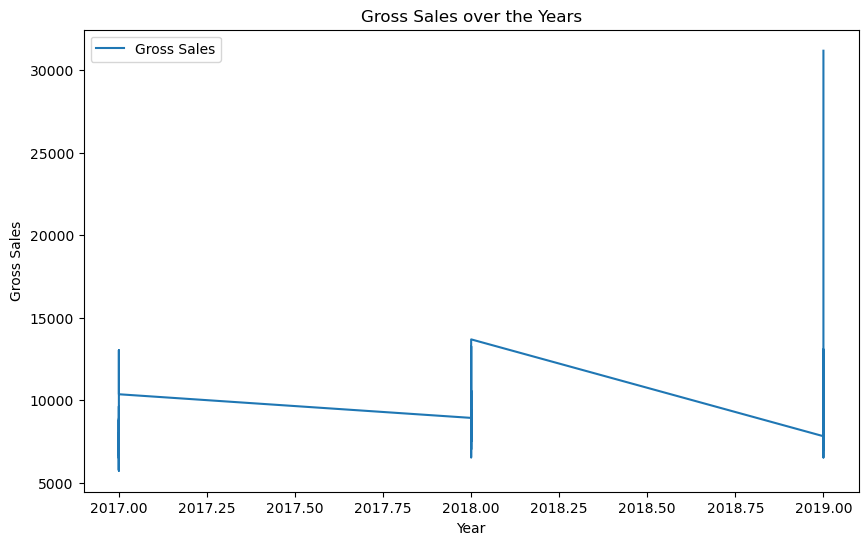

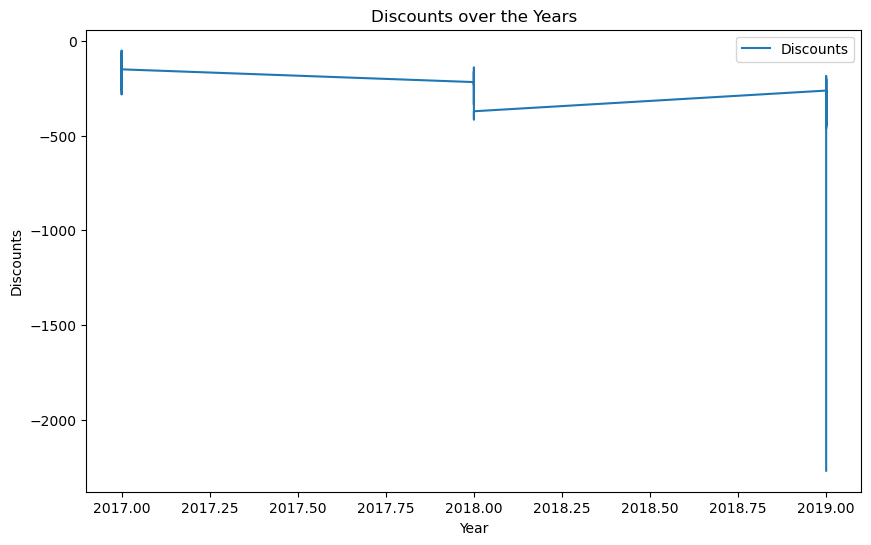

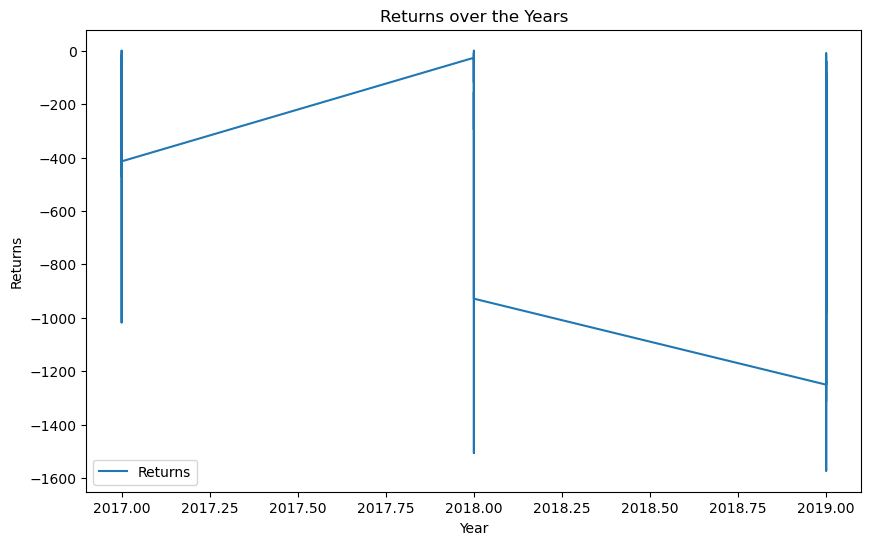

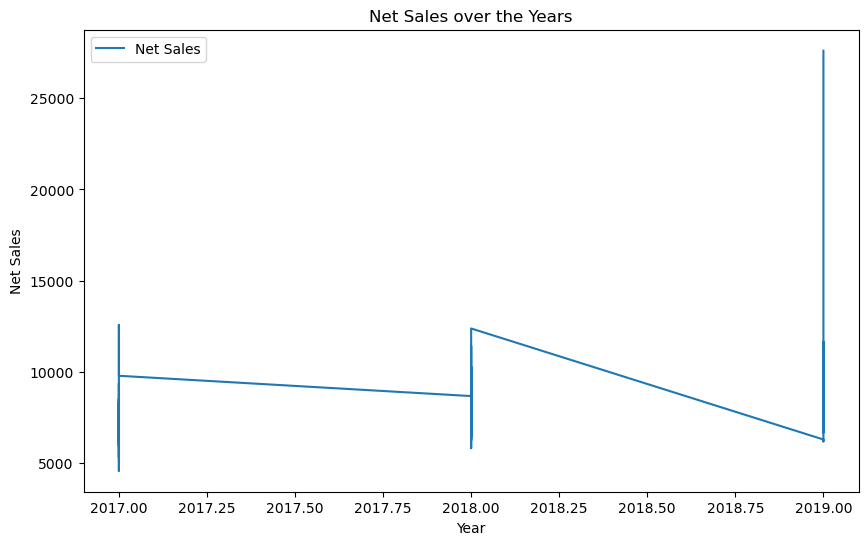

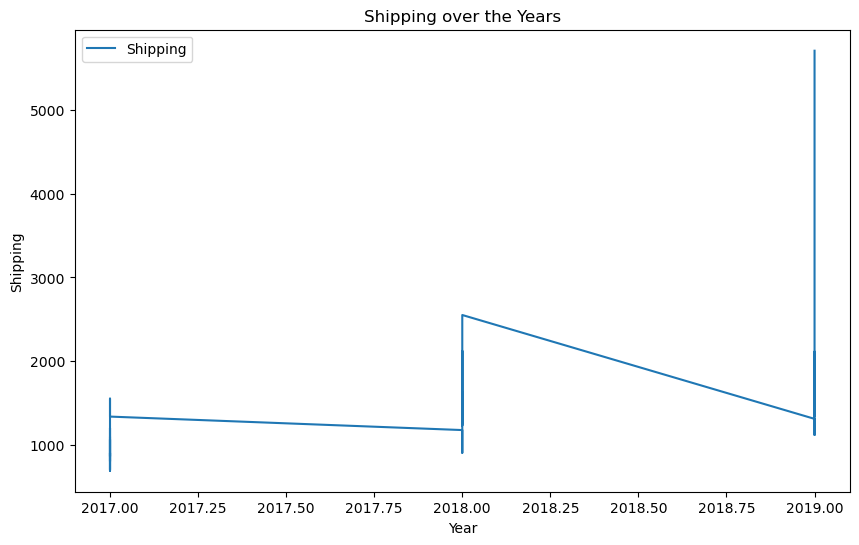

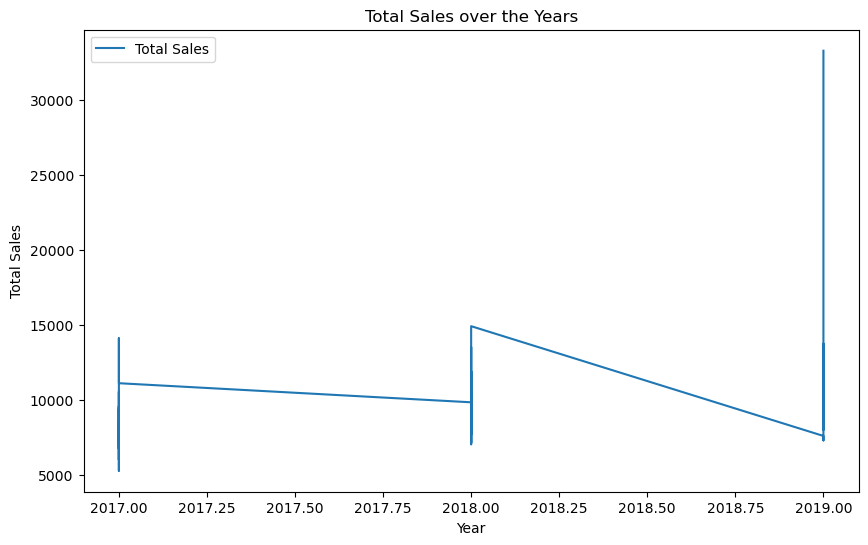

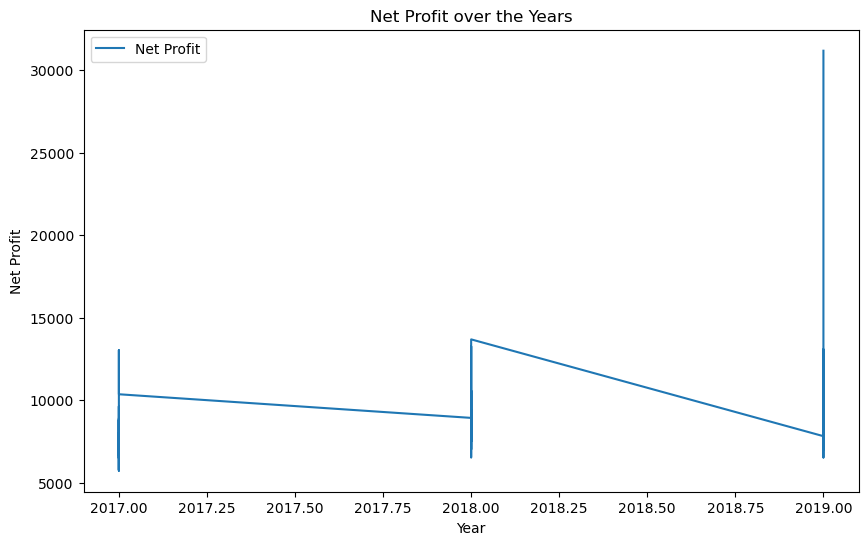

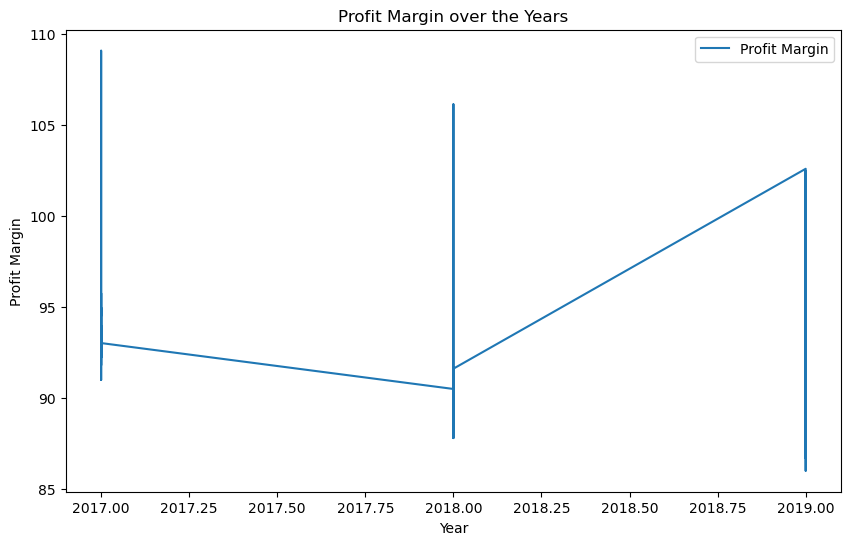

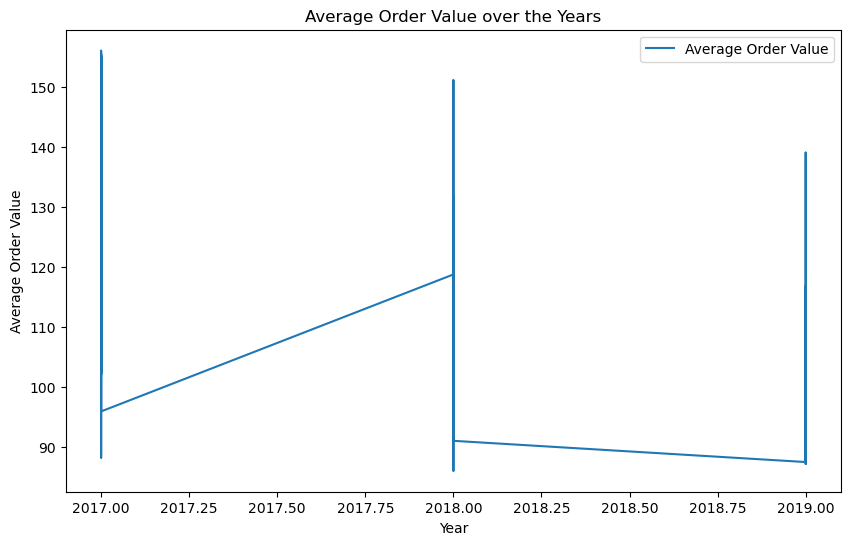

In [39]:
# Line plot for 'Year' and other numerical columns
for column in num_columns:
    if column != 'Year':
        df.plot(x='Year', y=column, kind='line', figsize=(10, 6))
        plt.title(f'{column} over the Years')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.show()

- The highest number of total orders and gross sales occurred in 2019. This suggests that there was a significant increase in customer demand or sales activities during that year. 
 - The year 2017 had the highest amount of discounts. This could indicate aggressive promotional strategies or clearance sales during that period to stimulate sales or clear excess inventory.
- Goods returned between 2017 to 2019 was relatively thesame. The consistency in the quantity of goods returned suggests that the rate of product returns remained relatively stable over this period. This could indicate consistent product quality or customer satisfaction levels.
- The net sale was highiest in 2019 and shipping over the years was also highiest in 2019. This indicates increased revenue from sales transactions and possibly higher shipping volumes to fulfill orders, reflecting overall business growth or increased customer activity.
- Total Sales and net profit was highiest in 2019 However the profit Margin was highiest in 2017 and decreased steadily till 2019.This suggests that despite potentially higher expenses such as discounts and shipping costs, the business achieved its highest revenue and profitability in that year.
- The highest profit margin occurred in 2017 and decreased steadily until 2019. This suggests that while the business may have experienced increased sales and revenue over the years, profit margins gradually decreased, possibly due to rising costs or changes in pricing strategies.
- The avearge order was highiest in 2017 and decreased marginally till 2019.This indicates that customers may have been making larger purchases in 2017 compared to subsequent years, which could have contributed to higher total sales and profitability during that period.



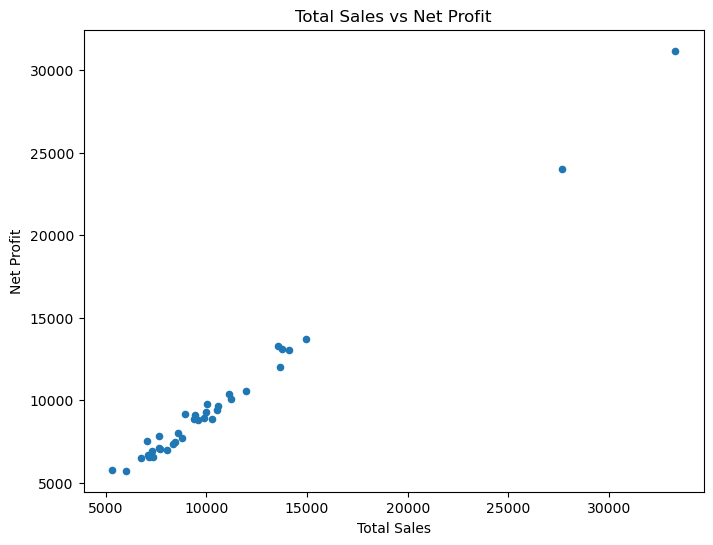

In [40]:
df.plot(x='Total Sales', y='Net Profit', kind='scatter', figsize=(8, 6))
plt.title('Total Sales vs Net Profit')
plt.xlabel('Total Sales')
plt.ylabel('Net Profit')
plt.show()

# This Plot shows a linear relationship between the Net profit and the Total sales.This suggests that the company is effectively converting sales revenue into profit. Costs are being managed efficiently or are relatively stable across different levels of sales. 
# This linear relationship is a positive sign for a business, indicating efficiency, scalability, and predictability in its operations

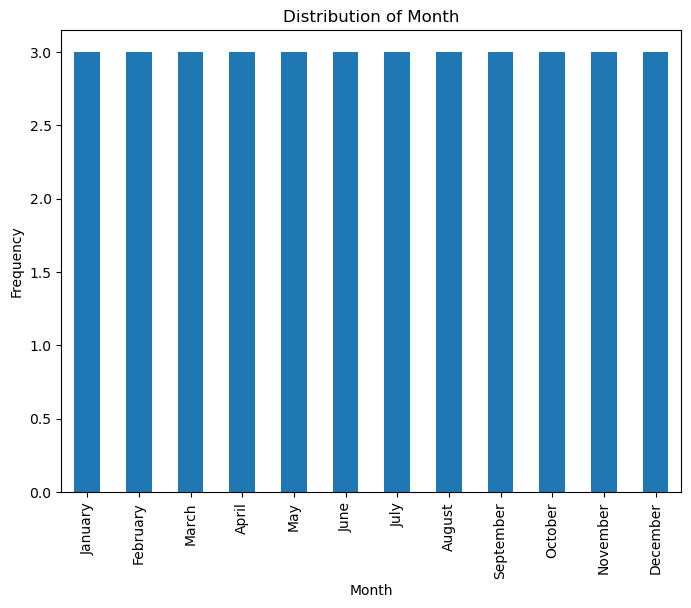

In [44]:
categorical_columns = ['Month']
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

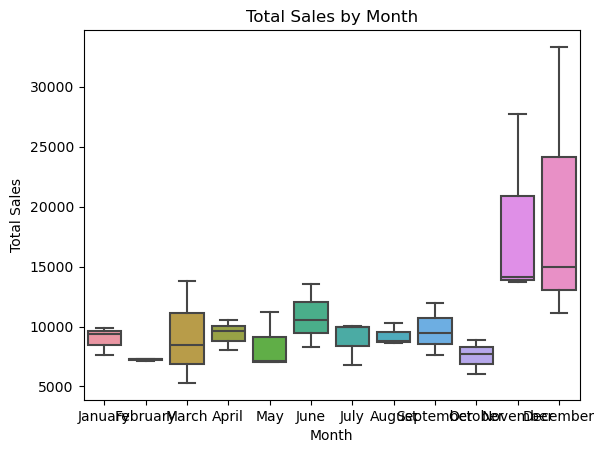

In [45]:
for column in categorical_columns:
    sns.boxplot(x=column, y='Total Sales', data=df)
    plt.title(f'Total Sales by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.show()